In [5]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv(r'sales_records.csv')
df
# Leer el csv y pasarlo a dataframe

,product,country,start_date,quantity,amount,card,Cust_ID,end_date,Contract ID
0,prod_4,unknown,2008-12-12,1,3,NaN,Cust_8,2009-12-12,Trx_14
1,prod_3,China,2009-04-10,2,160,N,Cust_2,2010-04-10,Trx_39
2,prod_3,China,2009-04-10,2,160,Y,Cust_5,2010-04-10,Trx_42
3,prod_3,China,2010-05-10,2,160,NaN,Cust_2,2011-05-10,Trx_18
4,prod_3,USA,2009-05-20,20,1600,NaN,Cust_3,2010-05-20,Trx_27
5,prod_3,Brazil,2009-06-08,15,1200,NaN,Cust_7,2010-06-08,Trx_21
6,prod_1,USA,2009-07-04,2,70,Y,Cust_3,2010-07-04,Trx_9
7,prod_1,USA,2009-07-14,2,70,NaN,Cust_6,2010-07-14,Trx_31
8,prod_3,USA,2010-08-20,20,1600,NaN,Cust_3,2011-08-20,Trx_5
9,prod_2,Germany,2009-11-02,15,600,NaN,Cust_1,2010-11-02,Trx_29


In [6]:
faltantes = []
for columna in df.columns:
    atributo = {}
    atributo["columna"] = columna
    atributo["porcentaje"] = np.mean(df[columna].isnull())*100
    atributo["cantidad"] = np.sum(df[columna].isnull())
    faltantes.append(atributo)  
faltantes_df = pd.DataFrame(faltantes)
faltantes_df
# Analizar los datos faltantes, en este caso hay datos faltantes en la columna 'card'

,columna,porcentaje,cantidad
0,product,0.000000,0
1,country,0.000000,0
2,start_date,0.000000,0
3,quantity,0.000000,0
4,amount,0.000000,0
5,card,53.061224,26
6,Cust_ID,0.000000,0
7,end_date,0.000000,0
8,Contract ID,0.000000,0


<AxesSubplot:xlabel='PAÍSES', ylabel='VENTAS'>

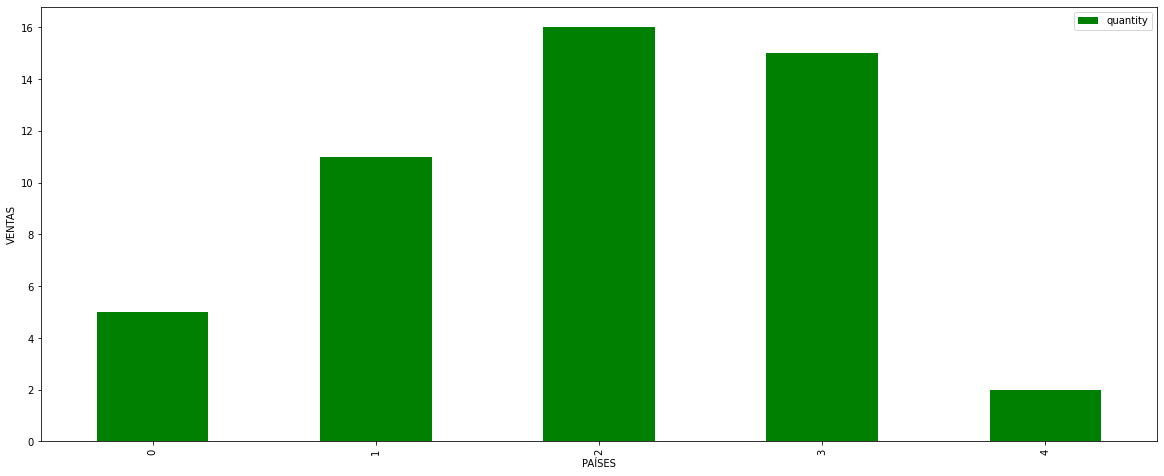

In [45]:
df_cantidad = df.groupby('country', as_index = False)[['quantity']].count()
df_cantidad  
df_cantidad.plot(kind='bar', figsize=(20,8), color="green", xlabel = 'PAÍSES', ylabel = "VENTAS")
# DataFrame para ver cual pais fue el que mas vendio

In [39]:
df_ganancias = df.groupby(['country', 'product']).agg({'amount':"sum", "start_date": 'min',"end_date": 'max'})
df_ganancias
# DataFrame para ver las ganancias de cada producto en un periodo de tiempo

amount  start_date    end_date
country product                                
Brazil  prod_1      210  2010-07-17  2012-09-06
        prod_2      240  2010-03-11  2011-03-11
        prod_3     1840  2009-06-08  2012-02-02
China   prod_1      875  2009-12-12  2018-10-01
        prod_3     1360  2009-04-10  2014-01-02
Germany prod_1      840  2009-12-02  2014-03-20
        prod_2     2920  2009-11-02  2018-02-01
        prod_3      400  2010-01-13  2011-09-14
USA     prod_1      735  2009-07-04  2012-10-11
        prod_2     2040  2010-01-20  2015-12-07
        prod_3     4880  2009-05-20  2016-03-17
unknown prod_4        6  2008-12-12  2017-01-01

In [44]:
df_pago = df.groupby(['Cust_ID', 'card'])[['quantity']].mean()
df_pago
# Promedio de pagos por tarjeta de cada cliente

quantity
Cust_ID card           
Cust_1  N      8.000000
        Y      1.000000
Cust_2  N      4.666667
        Y      1.000000
Cust_3  Y      5.750000
Cust_4  N     11.000000
        Y      3.000000
Cust_5  Y      6.000000
Cust_6  N     15.000000
        Y      4.333333
Cust_7  N      6.000000
        Y      8.000000